In [1]:
import tensorflow as tf
from keras import models , layers
import matplotlib.pyplot as plt



In [35]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [7]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/darre/OneDrive/Desktop/Darren/College Stuff/potato-disease-detection/Datasets/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE))

Found 2152 files belonging to 3 classes.


In [124]:
class_names=dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
for image_batch ,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    

(32, 256, 256, 3)
(32,)


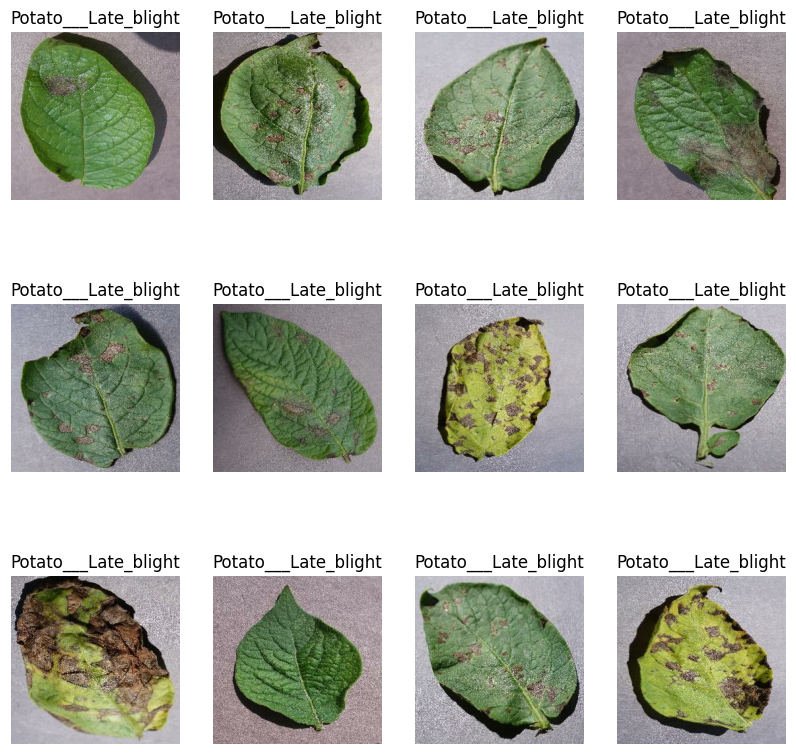

In [14]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[0]])
        plt.axis('off')


In [16]:
def get_dataset_partitions(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    if(shuffle):
        ds=ds.shuffle(shuffle_size,seed=12)
        train_size=int(train_split*len(ds))
        val_size=int(val_split*len(ds))
        train_ds=ds.take(train_size)
        val_ds=ds.skip(train_size).take(val_size)
        test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [18]:
train_ds,val_ds,test_ds=get_dataset_partitions(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)



In [26]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [28]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
])

In [31]:
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS))

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     multiple                  0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 115s 2s/step - loss: 0.8808 - accuracy: 0.5625 - val_loss: 0.6810 - val_accuracy: 0.6927
Epoch 2/50
54/54 [==============================] - 112s 2s/step - loss: 0.5255 - accuracy: 0.7697 - val_loss: 0.5256 - val_accuracy: 0.7656
Epoch 3/50
54/54 [==============================] - 113s 2s/step - loss: 0.3540 - accuracy: 0.8536 - val_loss: 0.2292 - val_accuracy: 0.8906
Epoch 4/50
54/54 [==============================] - 111s 2s/step - loss: 0.2748 - accuracy: 0.8877 - val_loss: 0.3261 - val_accuracy: 0.8854
Epoch 5/50
54/54 [==============================] - 111s 2s/step - loss: 0.2739 - accuracy: 0.8895 - val_loss: 0.3170 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 111s 2s/step - loss: 0.2383 - accuracy: 0.9010 - val_loss: 0.1651 - val_accuracy: 0.9167
Epoch 7/50
54/54 [==============================] - 114s 2s/step - loss: 0.1342 - accuracy: 0.9410 - val_loss: 0.2123 - val_accuracy: 0.9167
Epoch 8/50
54

In [37]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 5s 459ms/step - loss: 0.0250 - accuracy: 0.9922


In [38]:
scores

[0.024973394349217415, 0.9921875]

In [39]:
history

In [43]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Traing and Validation loss')

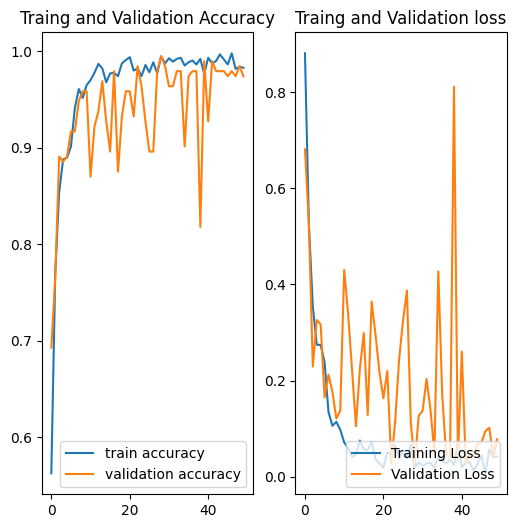

In [51]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="train accuracy")
plt.plot(range(EPOCHS),val_acc,label="validation accuracy")
plt.legend(loc='lower right')
plt.title('Traing and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='lower right')
plt.title('Traing and Validation loss')


In [96]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    plt.imshow(first_image)
    print("actual",class_names[first_label])
    batch_prediction=model.predict(image_batch)
    print('predicted label: ' ,class_names[np.argmax(batch_prediction[0])])



actual Potato___Late_blight
1/1 [==============================] - 1s 555ms/step
predicted label:  Potato___Late_blight


In [103]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 96ms/step


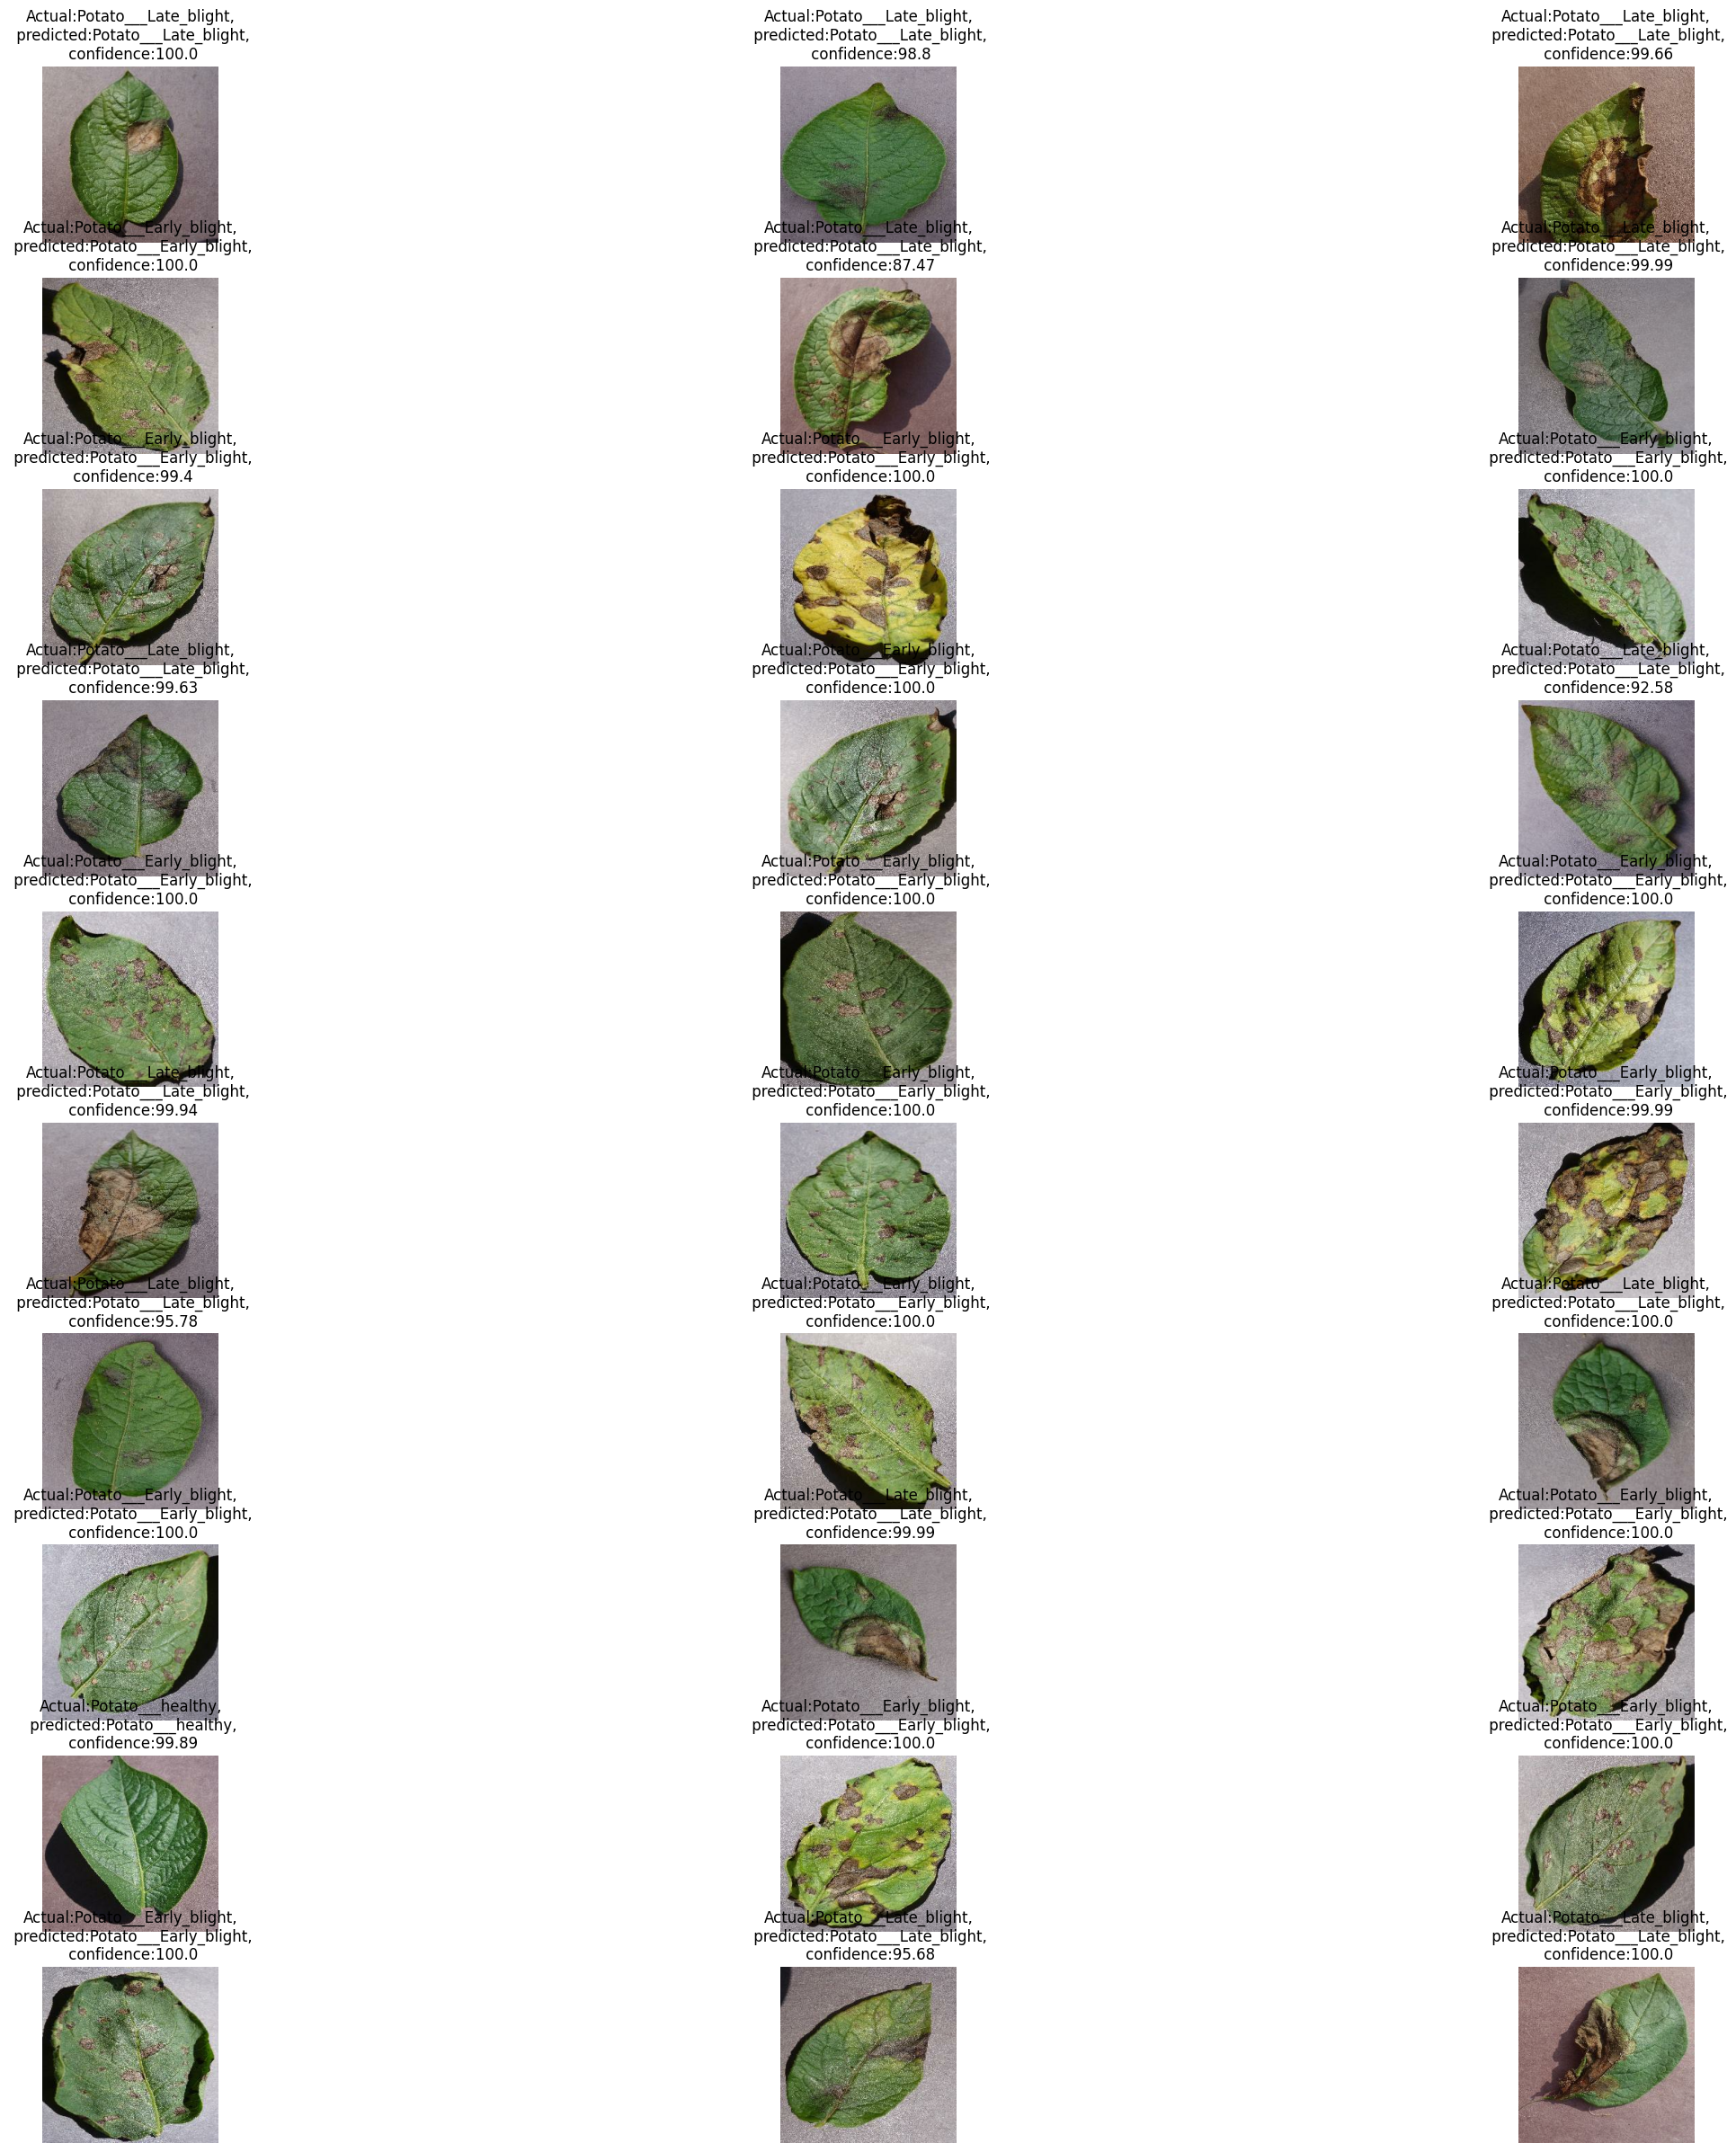

In [123]:
plt.figure(figsize=(30,30))
for images,labels in test_ds.take(1):
    for i in range (30):
        ax=plt.subplot(10,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n predicted:{predicted_class},\n confidence:{confidence}")
        plt.axis('off')


In [120]:
import os
model_versions=max([int(i[-1]) for i in os.listdir("/models")])+1
model.save(f"C:/Users/darre/OneDrive/Desktop/Darren/College Stuff/potato-disease-detection/models/model{model_versions}")

INFO:tensorflow:Assets written to: C:/Users/darre/OneDrive/Desktop/Darren/College Stuff/potato-disease-detection/models/model2\assets


INFO:tensorflow:Assets written to: C:/Users/darre/OneDrive/Desktop/Darren/College Stuff/potato-disease-detection/models/model2\assets
